In [1]:
from PIL import Image
import os, glob

print("PIL 라이브러리를 성공적으로 불러왔다.")

PIL 라이브러리를 성공적으로 불러왔다.


In [2]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 96x96 사이즈로 바꾸어 저장합니다.
	target_size=(96,96)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지가 재조정되었다.")

700  images to be resized.
700  images resized.
가위 이미지가 재조정되었다.


In [3]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 96x96 사이즈로 바꾸어 저장합니다.
	target_size=(96,96)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지가 재조정되었다.")

700  images to be resized.
700  images resized.
바위 이미지가 재조정되었다.


In [4]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 96x96 사이즈로 바꾸어 저장합니다.
	target_size=(96,96)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지가 재조정되었다.")

700  images to be resized.
700  images resized.
보 이미지가 재조정되었다.


In [5]:
import numpy as np

def load_data(img_path, number_of_data=2100):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=96
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습 데이터(x_train)의 이미지 개수는", idx,"개 입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습 데이터(x_train)의 이미지 개수는 2100 개 입니다.
x_train shape: (2100, 96, 96, 3)
y_train shape: (2100,)


라벨 :  0


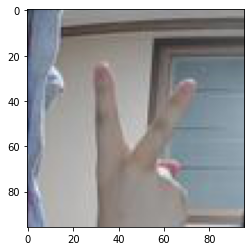

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨 : ', y_train[0])

In [114]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(96,96,3), padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (2,2), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (2,2), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  10
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 96, 96, 32)        416       
_________________________________________________________________
batch_normalization_27 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 24, 24, 128)       32896     
_________________________________________________________________
max_pooling2d_83 (MaxPooling

In [115]:
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape(-1, 96, 96, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Before Reshape - x_train_norm shape: (2100, 96, 96, 3)
After Reshape - x_train_reshaped shape: (2100, 96, 96, 3)
Epoch 1/10
66/66 [==============================] - 2s 20ms/step - loss: 0.6499 - accuracy: 0.7651
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.0033 - accuracy: 0.9992
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 3.5735e-04 - accuracy: 1.0000
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 1.8643e-04 - accuracy: 1.0000
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 1.3827e-04 - accuracy: 1.0000
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 7.5019e-05 - accuracy: 1.0000
Epoch 7/10
66/66 [==============================] - 1s 20ms/step - loss: 5.4880e-05 - accuracy: 1.0000
Epoch 8/10
66/66 [==============================] - 1s 21ms/step - loss: 3.5694e-05 - accuracy: 1.0000
Epoch 9/10
66/66 [==============================] - 1s 20ms/step - loss

In [116]:
from PIL import Image
import os, glob

print("PIL 라이브러리를 성공적으로 불러왔다.")

import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 96x96 사이즈로 바꾸어 저장합니다.
	target_size=(96,96)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
print("가위 이미지가 재조정되었다.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
print("바위 이미지가 재조정되었다.")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
print("보 이미지가 재조정되었다.")

import numpy as np

def load_data(img_path, number_of_data=350):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=96
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"개 입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

PIL 라이브러리를 성공적으로 불러왔다.
111  images to be resized.
111  images resized.
가위 이미지가 재조정되었다.
122  images to be resized.
122  images resized.
바위 이미지가 재조정되었다.
117  images to be resized.
117  images resized.
보 이미지가 재조정되었다.
테스트 데이터(x_test)의 이미지 개수는 350 개 입니다.
x_test shape: (350, 96, 96, 3)
y_test shape: (350,)


라벨 :  0
Before Reshape - x_test_norm shape: (350, 96, 96, 3)
After Reshape - x_test_reshaped shape: (350, 96, 96, 3)
11/11 - 0s - loss: 3.0489 - accuracy: 0.6000
test_loss: 3.0489094257354736 
test_accuracy: 0.6000000238418579


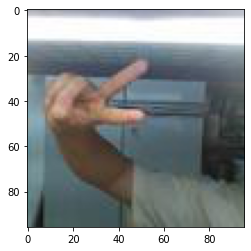

In [117]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨 : ', y_test[0])

print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape(-1, 96, 96, 3)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

In [118]:
model.evaluate(x_test_norm, y_test)

11/11 [==============================] - 0s 10ms/step - loss: 3.0489 - accuracy: 0.6000


[3.0489094257354736, 0.6000000238418579]

# 프로젝트 돌아보기

## 가위바위보 60% 달성까지

1. 사실 시행착오를 안하고 이런 결과가 나온다면 그것은 절대적인 운을 타고나지 않는 이상은 불가능한 일이었을 겁니다.
   저의 경우에는 학습 데이터의 개수가 충분히 많지 않았던 것이 Accuracy에 영향을 준 것 같다고 생각합니다.
2. 처음 프로젝트를 수행할 때는 가위, 바위, 보 3가지를 합쳐서 학습 데이터가 300개밖에 되지 않았는데 잘 되지 않아서
   다음 시도에서는 학습 데이터를 가위, 바위, 보 각각 350개씩 총 1050개를 가지고 시도해 보았습니다.
   다행히 해당 시도에서 기록한 Accuracy 값이 이전 학습 데이터 300개로 진행했을 때보다 높게 나왔습니다. (당시 51.49%)
   그래서 이 학습 데이터를 2배인 2100개(가위, 바위, 보 각각 700개씩)로 늘리고 테스트 데이터도 다른 교육생분 데이터를 가져다
   학습을 진행했습니다.
   AIFFEL LMS 노드에서 주어진 모델 Layer에서 한 층 더 쌓아서 파라미터를 몇십 번씩 바꿔가며 Evaluate를 진행해서
   드디어 정확히 60%에 도달할 수 있었습니다.
   loss 값이 3 정도면 많이 높다고 볼 수 있는지는 잘 모르겠지만, 만약 높다면 어떻게 이 부분을 줄일 수 있을지가 관건이라고 생각됩니다.

3. (프로젝트 수행소감) 첫 프로젝트였고 생각보다 60%를 달성하고자 학습 데이터, 테스트 데이터, 하이퍼파라미터 등을 바꾸어 가며 고생한 끝에
   목표했던 바를 이룰 수 있어서 저에게는 의미 있는 프로젝트라고 생각합니다.

   처음 Github로 제출하는 프로젝트라 많이 부족하지만, 앞으로 프로젝트를 해 나가면서 Git와 Github에 좀 더 익숙해지며
   좋은 결과물을 만들 수 있도록 하겠습니다.